<a href="https://colab.research.google.com/github/verokirk/CIND820/blob/main/CSTADS_Final_Results_and_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Appendix 1 - Final Results and Code**

In [ ]:
!pip install pandas numpy seaborn matplotlib

In [19]:
pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 32.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 47.7 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=3020ad49a2290d50f616ceefb6a1440db14ae1f5d0cfe47ef6ddd5e6d2ad488b
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


**Load and Review the Data**

In [226]:
import pandas as pd
import numpy as np
from google.colab import files

# Load the dataset
df = pd.read_csv("cstads_2122_pumf.csv")

# Dataset overview
print("Original DataFrame:\n")
print(df.shape)
df.describe()
df.info()

Original DataFrame:

(61096, 168)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61096 entries, 0 to 61095
Columns: 168 entries, SEQID to DVAVCIGD
dtypes: float64(1), int64(167)
memory usage: 78.3 MB


**Primary Dataset Preparation**
Data pre-processing including: identifying and handling missing or duplicate values, feature selection, creating a balanced dataset, graphically visualizing data, identifying correlations, and explaining them.


In [227]:
# Remove duplicates if any
df = df.drop_duplicates()

# Replace survey-specific missing value codes with pd.NA
df.replace({96: pd.NA, 98: pd.NA, 99: pd.NA, 996: pd.NA, 999: pd.NA}, inplace=True)

# Calculate percentage of missing values per column
missing_percentage = df.isnull().mean() * 100

# Drop columns with more than 50% missing values
df_cleaned = df.loc[:, missing_percentage <= 50]

# Move cleaned dataframe to df
df = df_cleaned

# Drop rows with any remaining missing values
df.dropna(inplace=True)

# Output updated dataframe info
print("Updated dataframe shape:\n", df.shape)
print("Updated dataframe features:\n", df.dtypes)

Updated dataframe shape:
 (23654, 133)
Updated dataframe features:
 SEQID       object
PROVID       int64
GRADE        int64
DVGENDER    object
DVURBAN      int64
             ...  
BUL_110     object
BUL_120     object
DVTY1ST     object
DVTY2ST     object
DVLAST30    object
Length: 133, dtype: object


In [230]:
import re

# Define the prefixes to exclude
exclude_prefixes = ["UND", "MET", "XTC", "HAL", "HER", "COC", "SYN", "BZP", "TNB", "TRP", "GLU", "SAL",
                    "SLP", "STI", "DEX", "GRV", "SED", "POLY", "DR",  "BUL"]

# Create a regex pattern to match column names starting with these prefixes
pattern = re.compile(r'^(?:' + '|'.join(exclude_prefixes) + r').*')

# Identify columns to drop
columns_to_drop = [col for col in df.columns if pattern.match(col)]

# Drop the unwanted columns
df_filtered = df.drop(columns=columns_to_drop)

# Print the removed columns
print("Removed columns:", columns_to_drop)

# Remaining dataset overview
print("\nCleaned DataFrame (columns not associated with smoking/alcohol/cannabis removed):\n")
print(df_filtered.shape)
df_filtered.describe()
df_filtered.info()

# Move cleaned dataframe to df for convenience
df = df_filtered

Removed columns: []

Cleaned DataFrame (columns not associated with smoking/alcohol/cannabis removed):

(23654, 73)
<class 'pandas.core.frame.DataFrame'>
Index: 23654 entries, 2 to 61095
Data columns (total 73 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SEQID       23654 non-null  object 
 1   PROVID      23654 non-null  int64  
 2   GRADE       23654 non-null  int64  
 3   DVGENDER    23654 non-null  object 
 4   DVURBAN     23654 non-null  int64  
 5   DVRES       23654 non-null  object 
 6   DVORIENT    23654 non-null  object 
 7   DVDESCRIBE  23654 non-null  object 
 8   WTPUMF      23654 non-null  float64
 9   GH_010      23654 non-null  object 
 10  GH_020      23654 non-null  object 
 11  SS_010      23654 non-null  object 
 12  TS_011      23654 non-null  object 
 13  TP_016      23654 non-null  object 
 14  TP_046      23654 non-null  object 
 15  TP_056      23654 non-null  object 
 16  TP_066      23654 non-null  object 
 

**Exploratory Data Analysis**

**Summary Statistics**

In [232]:
# Count unique values for categorical variables
print("\nCategorical Data Distribution:\n", df[['DVGENDER']].apply(pd.Series.value_counts))
print("\n", df[['PROVID']].apply(pd.Series.value_counts))
print("\n", df[['GRADE']].apply(pd.Series.value_counts))
print("\n", df[['DVURBAN']].apply(pd.Series.value_counts))


Categorical Data Distribution:
           DVGENDER
DVGENDER          
2            12464
1            11190

         PROVID
PROVID        
24        4197
48        3904
10        2879
12        2648
59        2425
47        2287
35        2266
11        1909
46        1139

        GRADE
GRADE       
8       4434
9       4347
10      4163
11      3956
7       3893
12      2861

          DVURBAN
DVURBAN         
1          19418
2           4236


**Explore Distributions and Relationships**

<ipython-input-233-0b987d4f3c19>:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Yes', 'No'], rotation=0)


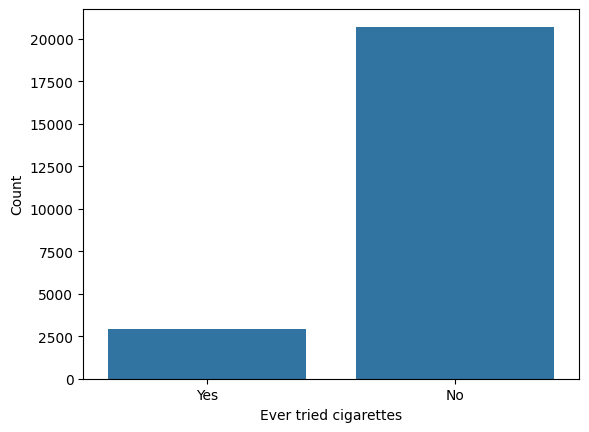

<ipython-input-233-0b987d4f3c19>:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Never tried either', \


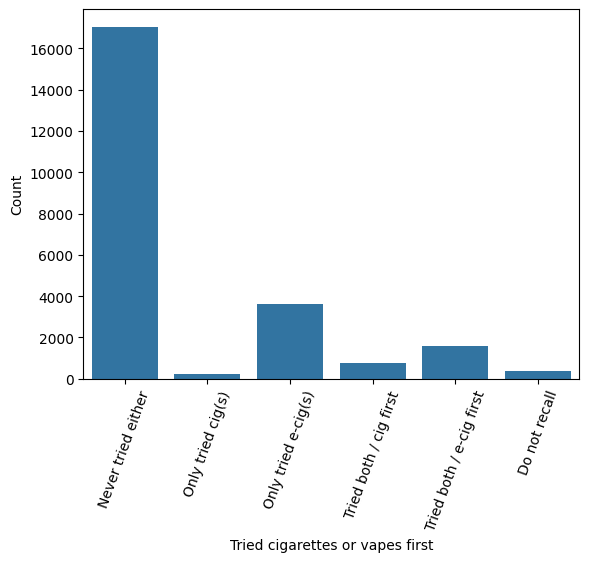

<ipython-input-233-0b987d4f3c19>:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Very difficult', 'Fairly difficult', \


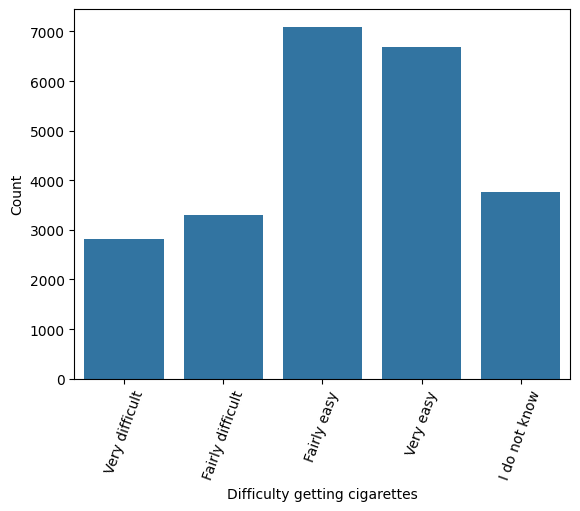

<ipython-input-233-0b987d4f3c19>:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Current Daily Smoker', 'Current Occasional Smoker', \


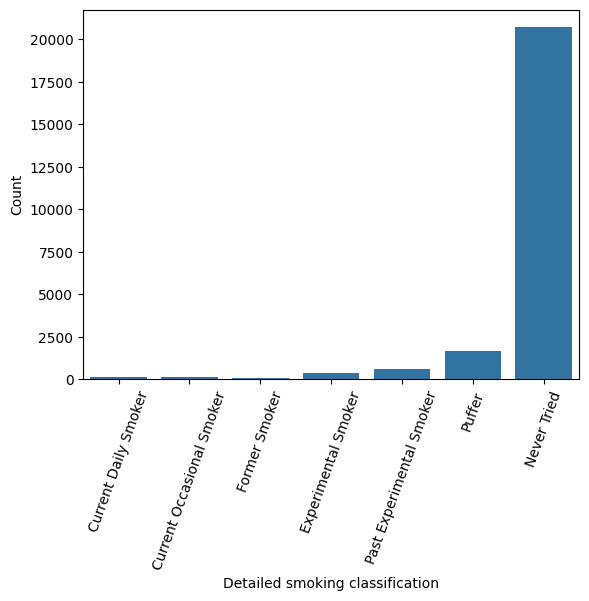

<ipython-input-233-0b987d4f3c19>:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Definitely yes (1)', 'Probably yes (2)', 'Probably not (3)', 'Definitely not (4)'], rotation=20)


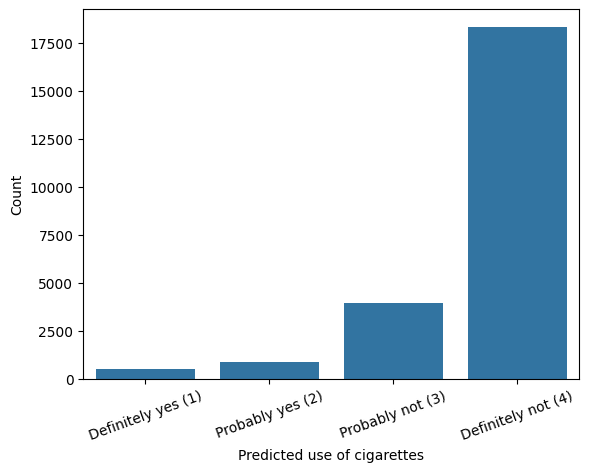

In [233]:
import seaborn as sns
import matplotlib.pyplot as plt

# Explore distributions
ax = sns.countplot(x='SS_010', data=df)
ax.set_xticklabels(['Yes', 'No'], rotation=0)
plt.xlabel('Ever tried cigarettes')
plt.ylabel('Count')
plt.show()

# Explore distributions
ax = sns.countplot(x='CI_010', data=df)
ax.set_xticklabels(['Never tried either', \
                    'Only tried cig(s)', \
                    'Only tried e-cig(s)', \
                    'Tried both / cig first', \
                    'Tried both / e-cig first', \
                    'Do not recall'], rotation=70)
plt.xlabel('Tried cigarettes or vapes first')
plt.ylabel('Count')
plt.show()

# Explore distributions
ax = sns.countplot(x='CA_020', data=df)
ax.set_xticklabels(['Very difficult', 'Fairly difficult', \
                    'Fairly easy', 'Very easy', 'I do not know'], rotation=70)
plt.xlabel('Difficulty getting cigarettes')
plt.ylabel('Count')
plt.show()

# explore distributions
ax = sns.countplot(x='DVTY2ST', data=df)
ax.set_xticklabels(['Current Daily Smoker', 'Current Occasional Smoker', \
                    'Former Smoker', 'Experimental Smoker', \
                    'Past Experimental Smoker', 'Puffer', 'Never Tried'], rotation=70)
plt.xlabel('Detailed smoking classification')
plt.ylabel('Count')
plt.show()

# explore distributions
ax = sns.countplot(x='TS_011', data=df)
ax.set_xticklabels(['Definitely yes (1)', 'Probably yes (2)', 'Probably not (3)', 'Definitely not (4)'], rotation=20)
plt.xlabel('Predicted use of cigarettes')
plt.ylabel('Count')
plt.show()


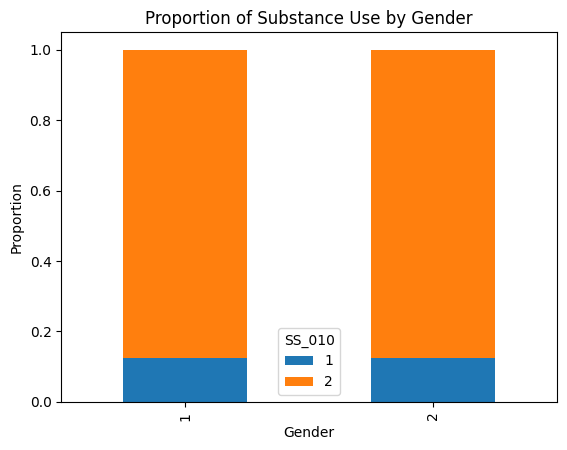

In [234]:
# Create a cross-tabulation (contingency table)
ct = pd.crosstab(df['DVGENDER'], df['SS_010'], normalize='index')

# Plot a stacked bar chart
ct.plot(kind='bar', stacked=True)

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Proportion')
plt.title('Proportion of Substance Use by Gender')

# Show the plot
plt.show()

**Generate EDA Report**

In [84]:
from ydata_profiling import ProfileReport

# Create the profile
profile = ProfileReport(df, title="CSTADS EDA Report", explorative=True)

# Save to an HTML file
profile.to_file("cstads_eda_report.html")
files.download("cstads_eda_report.html")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


 67%|██████▋   | 89/133 [00:02<00:01, 36.49it/s]/usr/local/lib/python3.11/dist-packages/ydata_profiling/model/pandas/summary_pandas.py:43: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  series = series.fillna(np.nan).infer_objects(copy=False)

100%|██████████| 133/133 [00:03<00:00, 34.60it/s]
/usr/local/lib/python3.11/dist-packages/ydata_profiling/model/pandas/duplicates_pandas.py:41: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  .reset_index(name=duplicates_key)
/usr/local/lib/python3.11/dist-packages/ydata_profiling/model/pandas/duplicates

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Adjust Data Types**

Most machine learning models cannot directly handle categorical data stored as object dtype in pandas. They typically require numerical input. Therefore, categorical data must be encoded before being used in models. However, in CSTADS, categorical data is stored as object but already contains numbers that represent meaningful categories, as such we will convert the columns back to numeric format without altering their values.

In [235]:
# Identify object columns
object_cols = df.select_dtypes(include=['object']).columns
print("Object columns before conversion:", object_cols.tolist())

# Convert object columns to numeric only if they contain numeric values
for col in object_cols:
    # Drop NaNs, convert to string, and check if all non-null values are numeric
    if df[col].dropna().astype(str).str.isnumeric().all():
        df[col] = pd.to_numeric(df[col])

# Verify dtypes after conversion
print("\nData types after conversion:")
print(df.dtypes)

Object columns before conversion: ['SEQID', 'DVGENDER', 'DVRES', 'DVORIENT', 'DVDESCRIBE', 'GH_010', 'GH_020', 'SS_010', 'TS_011', 'TP_016', 'TP_046', 'TP_056', 'TP_066', 'TP_086', 'ELC_026a', 'ELC_026b', 'ELC_026c', 'VAP_010', 'CI_010', 'VAP_020', 'VAP_030', 'VAP_040', 'VAP_050a', 'VAP_050b', 'VAP_060', 'ALC_010', 'NRG_010', 'NRG_020', 'NRG_030', 'NRG_040', 'NRG_050', 'CAN_010', 'CAN_130', 'CAN_140', 'BS_010', 'PR_100', 'PR_030', 'PR_050', 'PR_060', 'PR_110', 'PH_010', 'PH_020', 'PH_030', 'PH_040', 'PH_051', 'PH_061', 'PH_052', 'PH_062', 'PH_110', 'PH_120', 'PH_070', 'PH_080', 'PH_130', 'PH_140', 'PH_090', 'PH_100', 'CA_020', 'ELC_041', 'ELC_042', 'ALC_080', 'CAN_050', 'PR_090', 'BEH_010', 'BEH_020', 'BEH_030', 'BEH_040', 'DVTY1ST', 'DVTY2ST', 'DVLAST30']

Data types after conversion:
SEQID       int64
PROVID      int64
GRADE       int64
DVGENDER    int64
DVURBAN     int64
            ...  
BEH_030     int64
BEH_040     int64
DVTY1ST     int64
DVTY2ST     int64
DVLAST30    int64
Lengt

**CLASSIFICATION**

We will work with 2 dataframes:
1. df - a dataframe containing only the primary data.
2. merged_df - a dataframe containing the primary data and additional context data.


**Model 1 - Classification analysis using a Random Forest Classifier with k-fold cross-validation**

Target variable - TS_011 - Predicted use of cigarettes in the next 12 months

Accuracy: 0.819903610383022
Precision: 0.8021377845870976
Recall: 0.819903610383022
F1 Score: 0.8081115078638048

Classification Report:
               precision    recall  f1-score   support

           1       0.68      0.59      0.63       491
           2       0.46      0.21      0.29       864
           3       0.52      0.45      0.48      3952
           4       0.88      0.94      0.91     18347

    accuracy                           0.82     23654
   macro avg       0.64      0.55      0.58     23654
weighted avg       0.80      0.82      0.81     23654



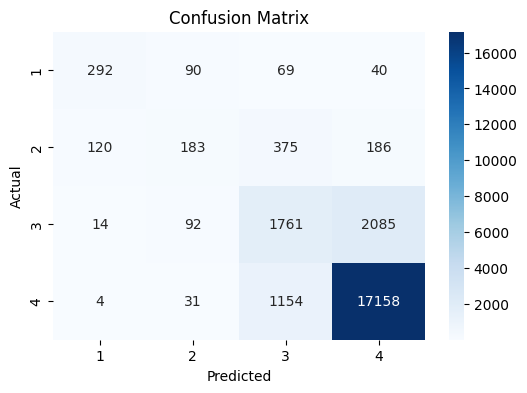

In [202]:
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer

# Define features (X) and target (y)
X = df.drop(columns=['TS_011'])
y = df['TS_011']

# Set up k-Fold Cross-Validation
k = 5  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Train a Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Generate cross-validated predictions
y_pred = cross_val_predict(model, X, y, cv=kf)

# Calculate and display metrics
print("Accuracy:", accuracy_score(y, y_pred))
print("Precision:", precision_score(y, y_pred, average='weighted'))
print("Recall:", recall_score(y, y_pred, average='weighted'))
print("F1 Score:", f1_score(y, y_pred, average='weighted'))

# Full classification report
print("\nClassification Report:\n", classification_report(y, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**Adding Context Data**

Read a file containing context data and merge it with the existing CSTADS data based on the PROVID column. Create a new comprehensive dataframe named "merged_df".

In [209]:
# Load CSTADS data
cstads_df = df

# Load context data
context_file = "Context Data 3.csv"
context_df = pd.read_csv(context_file)

# Merge datasets on the 'province_id' column
merged_df = cstads_df.merge(context_df, on="PROVID", how="left")

# Save the merged dataset (optional)
merged_df.to_csv("CSTADS_with_context.csv", index=False)

# Check the first few rows
# print("\n", merged_df.head())
# print(merged_df.dtypes)


**Generate EDA Report**

Perform analysis on merged dataset to examine correlations

In [123]:
from ydata_profiling import ProfileReport

# Create the profile
profile = ProfileReport(merged_df, title="Merged CSTADS EDA Report", explorative=True)

# Save to an HTML file
profile.to_file("merged_cstads_eda_report.html")
files.download("merged_cstads_eda_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 115/115 [00:02<00:00, 45.83it/s]


KeyboardInterrupt: 

**Rerun the model with context data**

Accuracy: 0.8215946562949185
Precision: 0.8031068385509972
Recall: 0.8215946562949185
F1 Score: 0.8092103986138576

Classification Report:
               precision    recall  f1-score   support

           1       0.67      0.59      0.63       491
           2       0.47      0.22      0.30       864
           3       0.53      0.44      0.48      3952
           4       0.88      0.94      0.91     18347

    accuracy                           0.82     23654
   macro avg       0.64      0.55      0.58     23654
weighted avg       0.80      0.82      0.81     23654



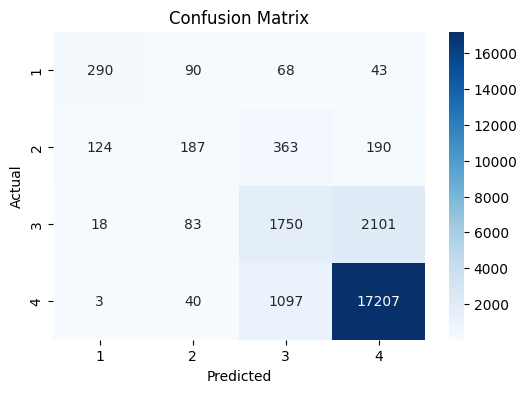

In [210]:
# Define features (X) and target (y) using the merged dataset
X = merged_df.drop(columns=['TS_011'])
y = merged_df['TS_011']

# Set up k-Fold Cross-Validation
k = 5  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Train a model using cross-validation
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Generate cross-validated predictions
y_pred = cross_val_predict(model, X, y, cv=kf)

# Calculate and display metrics
print("Accuracy:", accuracy_score(y, y_pred))
print("Precision:", precision_score(y, y_pred, average='weighted'))
print("Recall:", recall_score(y, y_pred, average='weighted'))
print("F1 Score:", f1_score(y, y_pred, average='weighted'))

# Full classification report
print("\nClassification Report:\n", classification_report(y, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**Model 2 - Classification analysis using Logistic Regression with k-fold cross-validation**

Target variable - TS_011 - Predicted use of cigarettes in the next 12 months


Accuracy: 0.812336179927285
Precision: 0.7863422030689603
Recall: 0.812336179927285
F1 Score: 0.7949895470476269

Classification Report:
               precision    recall  f1-score   support

           1       0.66      0.58      0.62       491
           2       0.45      0.25      0.32       864
           3       0.49      0.35      0.40      3952
           4       0.87      0.95      0.91     18347

    accuracy                           0.81     23654
   macro avg       0.62      0.53      0.56     23654
weighted avg       0.79      0.81      0.79     23654



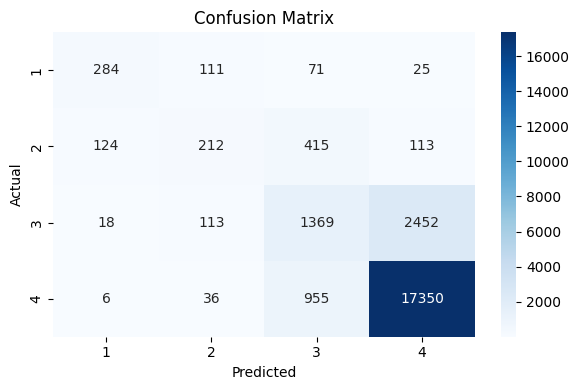

In [212]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Define features (X) and target (y)
X = df.drop(columns=['TS_011'])
y = df['TS_011']

# Feature scaling using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Set up k-Fold Cross-Validation
k = 5  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Initialize Logistic Regression model
model = LogisticRegression(max_iter=5000, random_state=42)

# Generate cross-validated predictions
y_pred = cross_val_predict(model, X_scaled, y, cv=kf)

# Evaluate performance
print("Accuracy:", accuracy_score(y, y_pred))
print("Precision:", precision_score(y, y_pred, average='weighted'))
print("Recall:", recall_score(y, y_pred, average='weighted'))
print("F1 Score:", f1_score(y, y_pred, average='weighted'))

# Full classification report
print("\nClassification Report:\n", classification_report(y, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

**Elimination of highly correlated variables**

Dropping highly correlated features: ['VAP_050b', 'ELC_042']
Accuracy: 0.8127589414052592
Precision: 0.7868586216674444
Recall: 0.8127589414052592
F1 Score: 0.7954458474832734

Classification Report:
               precision    recall  f1-score   support

           1       0.66      0.58      0.62       491
           2       0.45      0.25      0.32       864
           3       0.49      0.35      0.41      3952
           4       0.87      0.95      0.91     18347

    accuracy                           0.81     23654
   macro avg       0.62      0.53      0.56     23654
weighted avg       0.79      0.81      0.80     23654



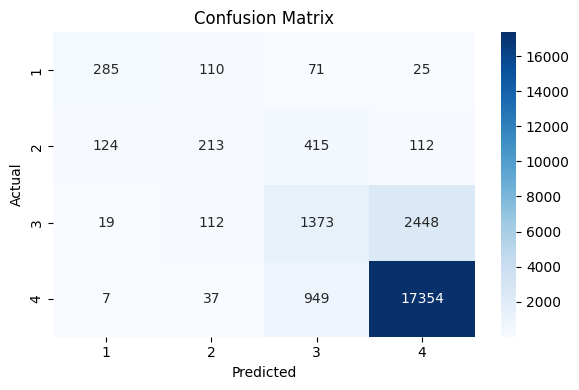

In [216]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import numpy as np  # Import NumPy

# Define features and target
X = df.drop(columns=['TS_011'])
y = df['TS_011']

# Step: Remove highly correlated features
corr_matrix = X.corr().abs()
upper_triangle = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(bool) # Use np.triu instead of pd.np.triu
)
high_corr_cols = [
    column for column in upper_triangle.columns if any(upper_triangle[column] > 0.85)
]
print("Dropping highly correlated features:", high_corr_cols)
X = X.drop(columns=high_corr_cols)

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Set up k-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Logistic Regression model
model = LogisticRegression(max_iter=5000, random_state=42)

# Generate cross-validated predictions
y_pred = cross_val_predict(model, X_scaled, y, cv=kf)

# Evaluate performance
print("Accuracy:", accuracy_score(y, y_pred))
print("Precision:", precision_score(y, y_pred, average='weighted'))
print("Recall:", recall_score(y, y_pred, average='weighted'))
print("F1 Score:", f1_score(y, y_pred, average='weighted'))

print("\nClassification Report:\n", classification_report(y, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

**Rerun the model with context data**

Accuracy: 0.8134353597700178
Precision: 0.7880417528224349
Recall: 0.8134353597700178
F1 Score: 0.7964187192740427

Classification Report:
               precision    recall  f1-score   support

           1       0.66      0.58      0.62       491
           2       0.46      0.26      0.33       864
           3       0.49      0.35      0.41      3952
           4       0.87      0.95      0.91     18347

    accuracy                           0.81     23654
   macro avg       0.62      0.53      0.57     23654
weighted avg       0.79      0.81      0.80     23654



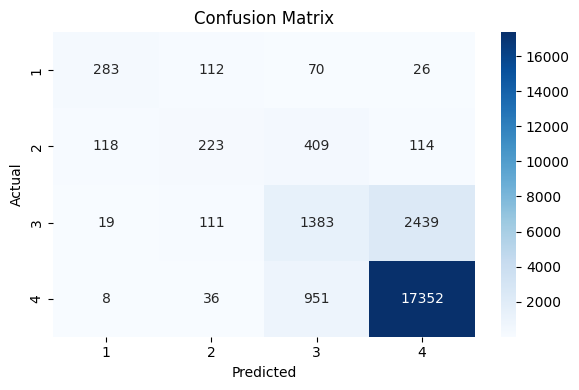

In [221]:
# Define features (X) and target (y) using merged_df
X = merged_df.drop(columns=['TS_011'])
y = merged_df['TS_011']

# Feature scaling using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Set up k-Fold Cross-Validation
k = 5  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Initialize Logistic Regression model
model = LogisticRegression(max_iter=5000, random_state=42)

# Generate cross-validated predictions
y_pred = cross_val_predict(model, X_scaled, y, cv=kf)

# Evaluate performance
print("Accuracy:", accuracy_score(y, y_pred))
print("Precision:", precision_score(y, y_pred, average='weighted'))
print("Recall:", recall_score(y, y_pred, average='weighted'))
print("F1 Score:", f1_score(y, y_pred, average='weighted'))

# Full classification report
print("\nClassification Report:\n", classification_report(y, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

**Remove Highly Correlated Features**

In [218]:
# Define features and target
X = merged_df.drop(columns=['TS_011'])
y = merged_df['TS_011']

# Step: Remove highly correlated features
corr_matrix = X.corr().abs()
upper_triangle = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(bool) # Use np.triu instead of pd.np.triu
)
high_corr_cols = [
    column for column in upper_triangle.columns if any(upper_triangle[column] > 0.85)
]
print("Dropping highly correlated features:", high_corr_cols)
X = X.drop(columns=high_corr_cols)

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Set up k-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Logistic Regression model
model = LogisticRegression(max_iter=5000, random_state=42)

# Generate cross-validated predictions
y_pred = cross_val_predict(model, X_scaled, y, cv=kf)

# Evaluate performance
print("Accuracy:", accuracy_score(y, y_pred))
print("Precision:", precision_score(y, y_pred, average='weighted'))
print("Recall:", recall_score(y, y_pred, average='weighted'))
print("F1 Score:", f1_score(y, y_pred, average='weighted'))

print("\nClassification Report:\n", classification_report(y, y_pred))

Dropping highly correlated features: ['VAP_050b', 'ELC_042', 'MEANCIGCOST']
Accuracy: 0.8133508074744229
Precision: 0.7879004336508605
Recall: 0.8133508074744229
F1 Score: 0.7963505084125293

Classification Report:
               precision    recall  f1-score   support

           1       0.66      0.58      0.62       491
           2       0.46      0.25      0.33       864
           3       0.49      0.35      0.41      3952
           4       0.87      0.95      0.91     18347

    accuracy                           0.81     23654
   macro avg       0.62      0.53      0.56     23654
weighted avg       0.79      0.81      0.80     23654



**XGBOOST**

In [73]:
pip install xgboost

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:56:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:57:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:57:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:57:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:57:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Accuracy: 0.8241312251627632
Precision: 0.8145073232860927
Recall: 0.8241312251627632
F1 Score: 0.8184303219374425

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.57      0.63       491
           1       0.42      0.27      0.33       864
           2       0.53      0.51      0.52      3952
           3       0.90      0.92      0.91     18347

    accuracy                           0.82     23654
   macro avg       0.63      0.57      0.60     23654
weighted avg       0.81      0.82      0.82     23654



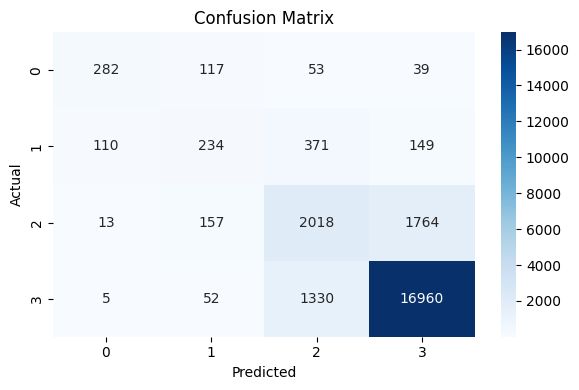

In [222]:
from xgboost import XGBClassifier
from sklearn.model_selection import KFold, cross_val_predict

# Define features and target
X = df.drop(columns=['TS_011'])
y = df['TS_011']

# Optional: Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize XGBoost classifier
model = XGBClassifier(
    objective='multi:softmax',
    num_class=4,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)

# Set up k-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Before fitting/predicting, adjust target variable labels to start from 0
y = y - 1

# Generate predictions
y_pred = cross_val_predict(model, X_scaled, y, cv=kf)

# Evaluate performance
print("Accuracy:", accuracy_score(y, y_pred))
print("Precision:", precision_score(y, y_pred, average='weighted'))
print("Recall:", recall_score(y, y_pred, average='weighted'))
print("F1 Score:", f1_score(y, y_pred, average='weighted'))

print("\nClassification Report:\n", classification_report(y, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

**Rerun the model with context data**

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:57:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:57:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:57:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:57:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:57:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Accuracy: 0.8235393590935994
Precision: 0.8132808919553798
Recall: 0.8235393590935994
F1 Score: 0.8173436717077077

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.57      0.62       491
           1       0.41      0.24      0.30       864
           2       0.53      0.51      0.52      3952
           3       0.90      0.92      0.91     18347

    accuracy                           0.82     23654
   macro avg       0.63      0.56      0.59     23654
weighted avg       0.81      0.82      0.82     23654



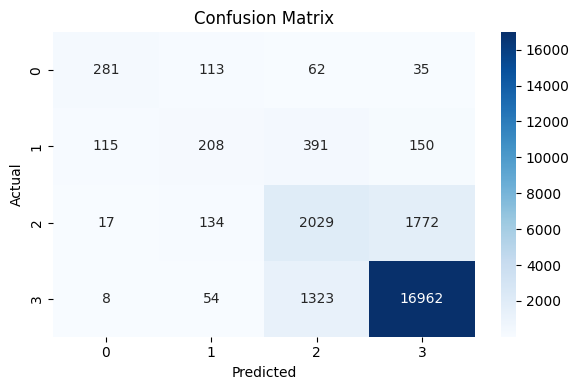

In [223]:
# Define features and target
X = merged_df.drop(columns=['TS_011'])
y = merged_df['TS_011']

# Optional: Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize XGBoost classifier
model = XGBClassifier(
    objective='multi:softmax',
    num_class=4,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)

# Set up k-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Before fitting/predicting, adjust target variable labels to start from 0
y = y - 1

# Generate predictions
y_pred = cross_val_predict(model, X_scaled, y, cv=kf)

# Evaluate performance
print("Accuracy:", accuracy_score(y, y_pred))
print("Precision:", precision_score(y, y_pred, average='weighted'))
print("Recall:", recall_score(y, y_pred, average='weighted'))
print("F1 Score:", f1_score(y, y_pred, average='weighted'))

print("\nClassification Report:\n", classification_report(y, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

**Feature Importance**

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:32:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


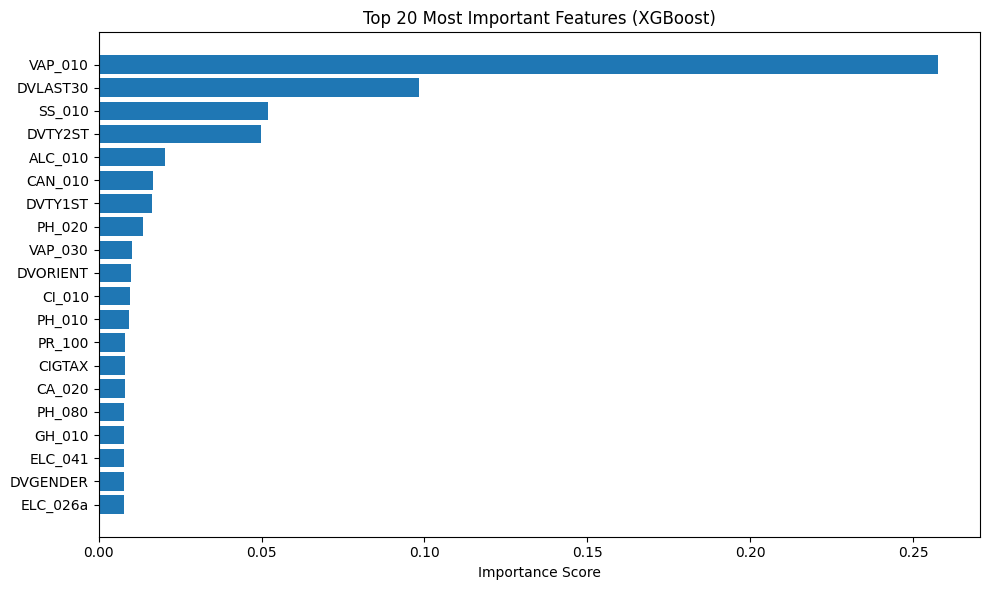

     Feature  Importance
20   VAP_010    0.257704
71  DVLAST30    0.098375
11    SS_010    0.051852
70   DVTY2ST    0.049963
28   ALC_010    0.020471
34   CAN_010    0.016693
69   DVTY1ST    0.016463
44    PH_020    0.013588
23   VAP_030    0.010355
6   DVORIENT    0.009986
21    CI_010    0.009621
43    PH_010    0.009254
38    PR_100    0.008194
77    CIGTAX    0.008184
59    CA_020    0.008016
54    PH_080    0.007890
9     GH_010    0.007884
60   ELC_041    0.007706
3   DVGENDER    0.007701
17  ELC_026a    0.007687


In [225]:
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display top 20 features
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:20][::-1], importance_df['Importance'][:20][::-1])
plt.title("Top 20 Most Important Features (XGBoost)")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

# Optional: Print top 20 for inspection
print(importance_df.head(20))

**CLUSTERING**

**Clean and prep the data**

In [ ]:
import pandas as pd
import numpy as np
from google.colab import files

# Load the dataset
df = pd.read_csv("cstads_2122_pumf.csv")

# Define the list of features to keep
features_to_keep = [
    # Smoking-related features
    "SS_010", "SS_020", "TS_011", "SS_030", "SS_040", "WP_040a", "WP_040b", "WP_040c", "WP_040d",
    "WP_040e", "WP_040f", "WP_040g", "SC_010", "CA_011", "TP_001", "TP_016", "TP_046", "TP_056",
    "TP_066", "TP_086",

    # Vaping-related features
    "ELC_026a", "ELC_026b", "ELC_026c", "VAP_010", "CI_010", "VAP_020", "VAP_030", "VAP_040",
    "VAP_050a", "VAP_050b", "VAP_060",

    # Respondent characteristics
    "PROVID", "GRADE", "DVGENDER", "DVURBAN", "DVRES", "DVORIENT", "DVDESCRIBE"
]

# Drop all columns that are NOT in the features_to_keep list
df = df[features_to_keep]

# Remove duplicates if any
df = df.drop_duplicates()

# Identify missing values
df.replace({96: pd.NA, 98: pd.NA, 99: pd.NA, 996: pd.NA, 999: pd.NA}, inplace=True)

# Calculate the percentage of missing values per column
missing_percentage = df.isnull().mean() * 100

# Drop columns with more than 50% missing values
df_cleaned = df.loc[:, missing_percentage <= 50]

# Move cleaned dataframe to df for convenience
df = df_cleaned

# Drop all rows that still contain any missing values
df.dropna(inplace=True)

# Print new dataframe shape to confirm columns are dropped
print("Updated dataframe shape:\n", df.shape)
print("Updated dataframe features:\n", df.dtypes)

Updated dataframe shape:
 (17853, 25)
Updated dataframe features:
 SS_010        object
TS_011        object
TP_016        object
TP_046        object
TP_056        object
TP_066        object
TP_086        object
ELC_026a      object
ELC_026b      object
ELC_026c      object
VAP_010       object
CI_010        object
VAP_020       object
VAP_030       object
VAP_040       object
VAP_050a      object
VAP_050b      object
VAP_060       object
PROVID         int64
GRADE          int64
DVGENDER      object
DVURBAN        int64
DVRES         object
DVORIENT      object
DVDESCRIBE    object
dtype: object


<ipython-input-101-f6fa1558978d>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


**Identify and drop highly correlated features**

In [ ]:
# Set correlation threshold
threshold = 0.8

# Compute the correlation matrix
corr_matrix = df.corr()

# Find pairs of highly correlated features
high_corr_features = []

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:  # Check absolute correlation
            high_corr_features.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

# Print highly correlated features
if high_corr_features:
    print("Highly Correlated Features (|Correlation| > 0.8):")
    for feature1, feature2, corr_value in high_corr_features:
        print(f"{feature1} ↔ {feature2} | Correlation: {corr_value:.3f}")
else:
    print("No highly correlated features found.")

# Remove one feature from each highly correlated pair identified above
features_to_drop = set()
for feature1, feature2, _ in high_corr_features:
    features_to_drop.add(feature2)  # Drop the second feature in the pair

df.drop(columns=features_to_drop, inplace=True)

print(f"Dropped {len(features_to_drop)} feature(s) due to high correlation.")

# Print new dataframe shape to confirm columns are dropped
print("Updated dataframe shape:", df.shape)
print("Updated dataframe features:\n", df.dtypes)

No highly correlated features found.
Dropped 0 feature(s) due to high correlation.
Updated dataframe shape: (17853, 24)
Updated dataframe features:
 SS_010        object
TS_011        object
TP_016        object
TP_046        object
TP_056        object
TP_066        object
TP_086        object
ELC_026a      object
ELC_026b      object
ELC_026c      object
VAP_010       object
CI_010        object
VAP_020       object
VAP_030       object
VAP_040       object
VAP_050b      object
VAP_060       object
PROVID         int64
GRADE          int64
DVGENDER      object
DVURBAN        int64
DVRES         object
DVORIENT      object
DVDESCRIBE    object
dtype: object


**Model 1 - DBSCAN Clustering Analysis**

Cluster distribution:
 Cluster
-1      5001
 3      3585
 0      2187
 1      2056
 2      1288
        ... 
 80        5
 117       5
 89        5
 101       5
 118       4
Name: count, Length: 120, dtype: int64


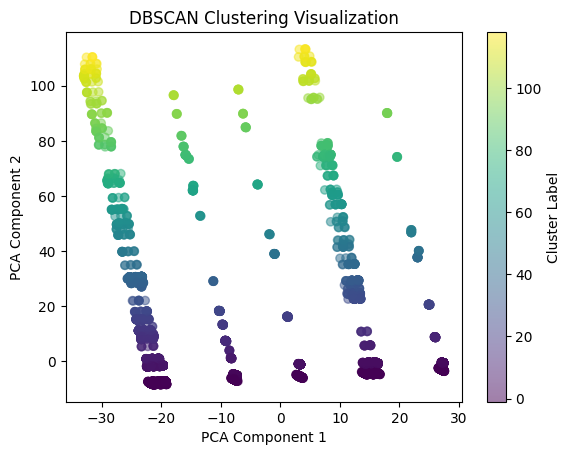

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=3.5, min_samples=5)  # Adjust 'eps' based on data distribution
clusters = dbscan.fit_predict(df)

# Add cluster labels to the original dataframe
df['Cluster'] = clusters

# Analyze cluster distribution
print("Cluster distribution:\n", df['Cluster'].value_counts())

# Visualize Clusters using PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df)
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df['Cluster'], cmap='viridis', alpha=0.5)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("DBSCAN Clustering Visualization")
plt.colorbar(label="Cluster Label")
plt.show()


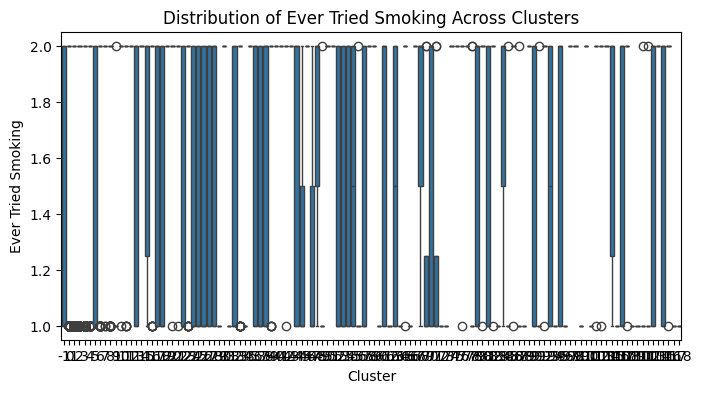

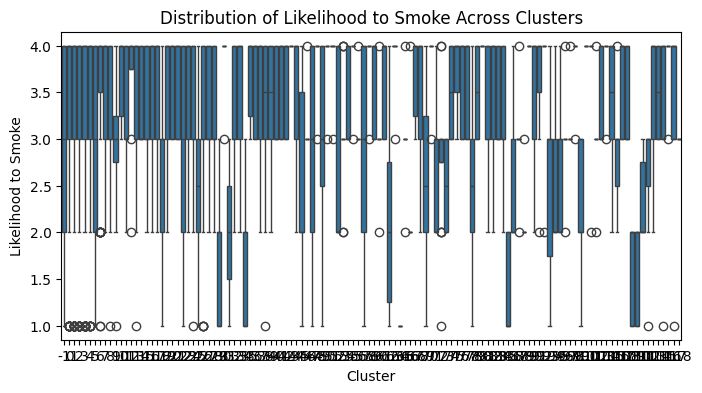

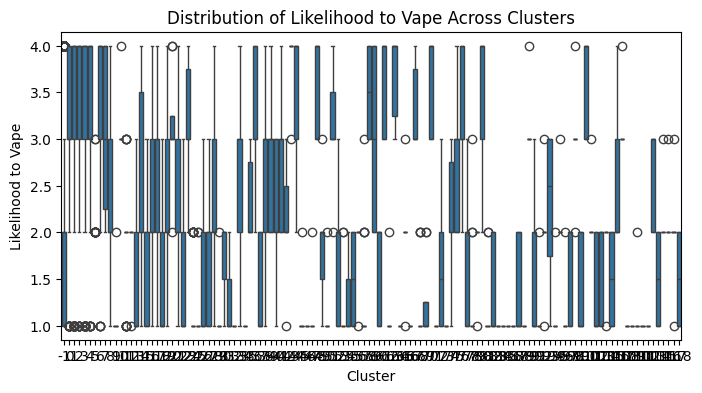

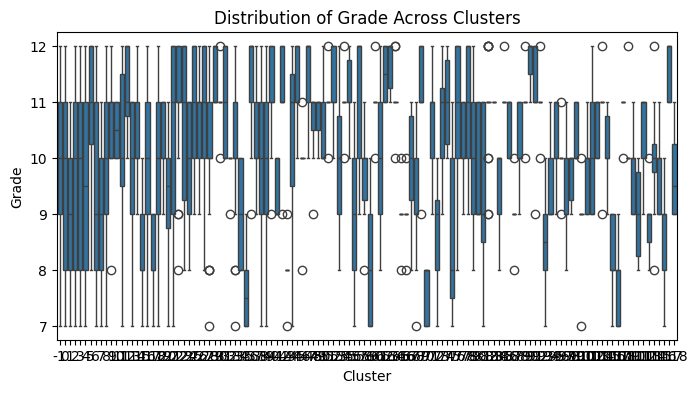

In [ ]:
# A dictionary mapping variable names to short descriptions
column_mapping = {
    "SS_010": "Ever Tried Smoking",
    "TS_011": "Likelihood to Smoke",
    "SS_030": "Ever Smoked a Whole Cigarette",
    "SS_040": "Smoked 100+ Cigarettes",
    "WP_040a": "Cigarettes/Day (Day 1)",
    "WP_040b": "Cigarettes/Day (Day 2)",
    "WP_040c": "Cigarettes/Day (Day 3)",
    "WP_040d": "Cigarettes/Day (Day 4)",
    "WP_040e": "Cigarettes/Day (Day 5)",
    "WP_040f": "Cigarettes/Day (Day 6)",
    "WP_040g": "Cigarettes/Day (Day 7)",
    "SC_010": "Tried to Quit Smoking",
    "CA_011": "Usual Cigarette Source",
    "TP_001": "Cigarettes in Last 30 Days",
    "TP_016": "Cigars in Last 30 Days",
    "TP_046": "Smokeless Tobacco in 30 Days",
    "TP_056": "Nicotine Therapy in 30 Days",
    "TP_066": "Hookah Use in 30 Days",
    "TP_086": "Heated Tobacco in 30 Days",
    "ELC_026a": "Vaped Nicotine (30 Days)",
    "ELC_026b": "Vaped No Nicotine (30 Days)",
    "ELC_026c": "Vaped Unknown Substance (30 Days)",
    "VAP_010": "Likelihood to Vape",
    "CI_010": "First Use: Cigarette or Vape?",
    "VAP_020": "Most Used Vape Flavor",
    "VAP_030": "Reason for Trying Vaping",
    "VAP_040": "Reason for Continued Vaping",
    "VAP_050a": "Usual Vape Device Source",
    "VAP_050b": "Usual E-Liquid Source",
    "VAP_060": "Tried to Quit Vaping",
    "SEQID": "Respondent ID",
    "PROVID": "Province",
    "GRADE": "Grade",
    "DVGENDER": "Gender",
    "DVURBAN": "Urban/Rural School",
    "DVRES": "Years in Canada",
    "DVORIENT": "Sexual Orientation",
    "DVDESCRIBE": "Ethnicity"
}

# The variables to visualize
selected_columns = ["Ever Tried Smoking", "Likelihood to Smoke", "Likelihood to Vape", "Grade"]

# Rename columns in the DataFrame
named_df=df.rename(columns=column_mapping)

# Display cluster modes
#cluster_modes = df.groupby('Cluster').agg(pd.Series.mode)
#print(cluster_modes)

# Generate boxplots for the selected columns
for col in selected_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=named_df['Cluster'], y=named_df[col])
    plt.title(f"Distribution of {col} Across Clusters")
    plt.show()



**Rerun the model with context data**

In [ ]:
# Load CSTADS data
cstads_df = df

# Load context data
context_file = "Context Data.csv"
context_df = pd.read_csv(context_file)

# Merge datasets on the 'province_id' column
merged_df = cstads_df.merge(context_df, on="PROVID", how="left")


Cluster distribution:
 Cluster
-1     5331
 3     3582
 0     2169
 1     2056
 2     1288
       ... 
 82       5
 87       5
 68       5
 91       5
 80       5
Name: count, Length: 94, dtype: int64


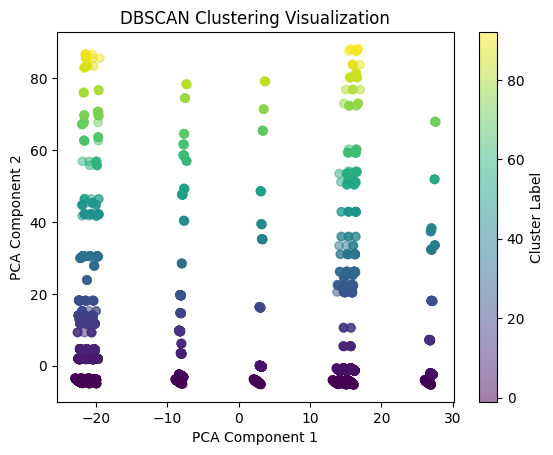

In [ ]:
# Apply DBSCAN clustering
dbscan = DBSCAN(eps=3.5, min_samples=5)
clusters = dbscan.fit_predict(merged_df)

# Add cluster labels to the original dataframe
merged_df['Cluster'] = clusters

# Analyze cluster distribution
print("Cluster distribution:\n", merged_df['Cluster'].value_counts())

# Visualize Clusters using PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(merged_df)
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=merged_df['Cluster'], cmap='viridis', alpha=0.5)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("DBSCAN Clustering Visualization")
plt.colorbar(label="Cluster Label")
plt.show()


**Model 2 - K-Means Clustering Analysis**

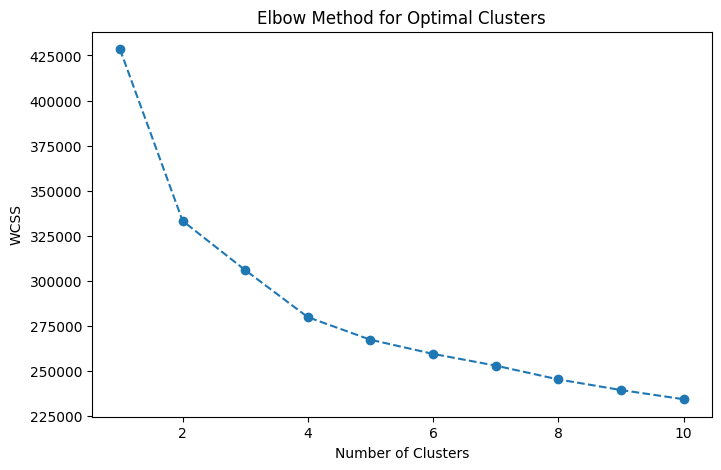

In [ ]:
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define features (X) using the original df dataset
X = df.drop(columns=['TS_011'], errors='ignore')  # Exclude the target variable

# Ensure X has no missing values using the most frequent value
imputer = SimpleImputer(strategy='most_frequent')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Feature scaling using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the Elbow Method
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal Clusters')
plt.show()

In [ ]:
# Run K-Means
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Check cluster distribution
print(df['Cluster'].value_counts())

# Most common category per cluster
print(df.groupby('Cluster').apply(lambda x: x.mode().iloc[0]))


Cluster
0    5612
1    5278
4    3178
2    3083
3     702
Name: count, dtype: int64
0        SS_010  TS_011  TP_016  TP_046  TP_056  TP_066  TP_086  ELC_026a  \
Cluster                                                                     
0             2       4       5       5       5       5       5         5   
1             2       4       5       5       5       5       5         5   
2             2       4       5       5       5       5       5         4   
3             1       1       4       4       4       4       4         1   
4             1       3       5       5       5       5       5         1   

0        ELC_026b  ELC_026c  ...  VAP_050b  VAP_060  PROVID  GRADE  DVGENDER  \
Cluster                      ...                                               
0               5         5  ...         1        1      24     10         1   
1               5         5  ...         1        2      48      8         2   
2               5         5  ...         7        3     

<ipython-input-129-04196cd6a29f>:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  print(df.groupby('Cluster').apply(lambda x: x.mode().iloc[0]))


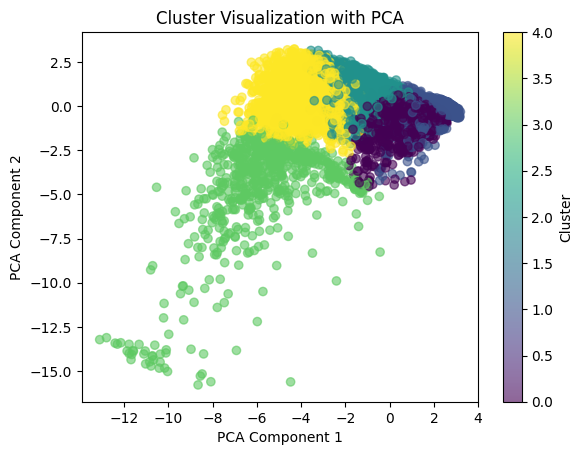

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'], cmap='viridis', alpha=0.6)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Cluster Visualization with PCA")
plt.colorbar(label="Cluster")
plt.show()

In [ ]:
# Create a DataFrame showing how much each original feature contributes to PC1 and PC2
pca_loadings = pd.DataFrame(pca.components_, columns=X.columns, index=['PCA1', 'PCA2'])

# Display the loadings
print(pca_loadings.T.sort_values(by='PCA1', ascending=False))  # Sort by PC1 contribution
print(pca_loadings.T.sort_values(by='PCA2', ascending=False))  # Sort by PC2 contribution

                PCA1      PCA2
ELC_026a    0.341374 -0.117446
VAP_010     0.310791 -0.151067
SS_010      0.246812  0.059644
ELC_026b    0.225379  0.050585
ELC_026c    0.221861  0.064475
TP_056      0.210585  0.096700
TP_016      0.201025  0.366911
TP_046      0.169233  0.428861
TP_066      0.157439  0.425117
TP_086      0.148399  0.423811
DVRES       0.085906 -0.036159
DVDESCRIBE  0.084028 -0.053969
PROVID      0.061813 -0.084891
DVGENDER    0.009945 -0.156690
DVORIENT   -0.000461 -0.018479
DVURBAN    -0.024548  0.021373
Cluster    -0.086152 -0.220258
GRADE      -0.098996  0.008158
VAP_020    -0.225282  0.185512
VAP_030    -0.248979  0.071310
VAP_060    -0.257376  0.217523
VAP_050b   -0.264322  0.240404
CI_010     -0.289099  0.068861
VAP_040    -0.311637  0.173684
                PCA1      PCA2
TP_046      0.169233  0.428861
TP_066      0.157439  0.425117
TP_086      0.148399  0.423811
TP_016      0.201025  0.366911
VAP_050b   -0.264322  0.240404
VAP_060    -0.257376  0.217523
VAP_020 

**Rerun the analysis on the merged dataset**

In [ ]:
# Load CSTADS data
cstads_df = df

# Load context data
context_file = "Context Data.csv"
context_df = pd.read_csv(context_file)

# Merge datasets on the 'province_id' column
merged_df = cstads_df.merge(context_df, on="PROVID", how="left")

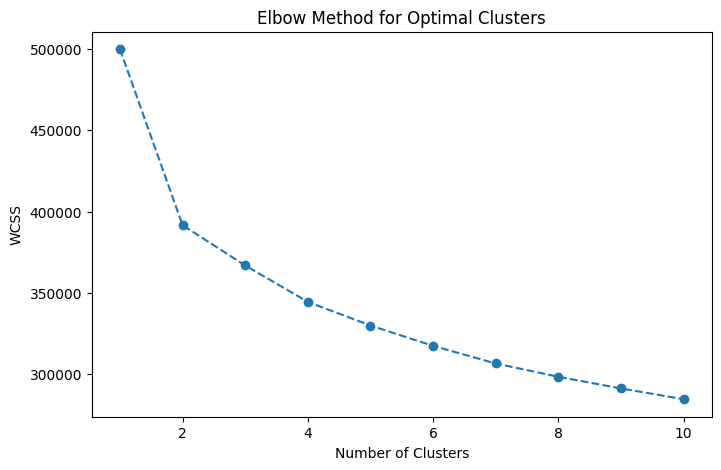

In [ ]:
# Define features (X) using the merged_df dataset
X = merged_df.drop(columns=['TS_011'], errors='ignore')  # Exclude the target variable

# Ensure X has no missing values using the most frequent value
imputer = SimpleImputer(strategy='most_frequent')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Feature scaling using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the Elbow Method
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal Clusters')
plt.show()

In [ ]:
# Choose an appropriate number of clusters (k=5 based on the elbow method)
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_scaled)

# Add cluster labels to the dataframe
merged_df['Cluster'] = cluster_labels

# Display cluster counts
print("Cluster distribution:\n", merged_df['Cluster'].value_counts())

Cluster distribution:
 Cluster
2    6496
3    5042
1    3352
4    2139
0     824
Name: count, dtype: int64


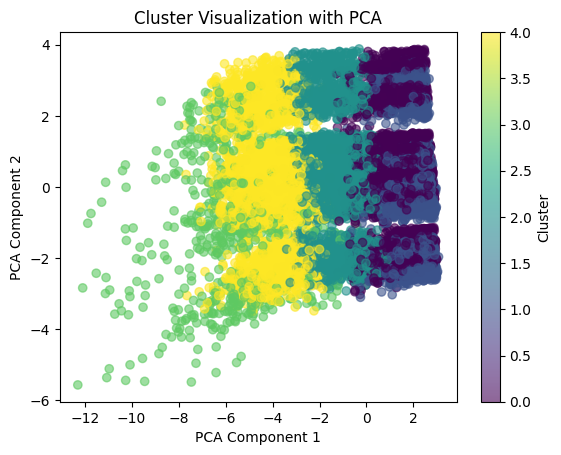

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'], cmap='viridis', alpha=0.6)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Cluster Visualization with PCA")
plt.colorbar(label="Cluster")
plt.show()